In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
stocks = ['AAPL', 'GOOG', 'MSFT', 'BRK-B', 'DDS', 'GPK', 'TSLA', 'FXAIX']

start_date = '2012-01-01'
end_date = '2023-04-01'

stock_data = {}
for stock in stocks:
    stock_data[stock] = yf.download(stock, start=start_date, end=end_date)['Adj Close']

df = pd.concat(stock_data, axis=1)

df.columns = stocks

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL        GOOG        MSFT       BRK-B         DDS  \
Date                                                                     
2012-01-03   12.500192   16.573130   21.413065   77.680000   35.932468   
2012-01-04   12.567370   16.644611   21.917002   76.800003   35.084507   
2012-01-05   12.706893   16.413727   22.140968   76.930000   36.429829   
2012-01-06   12.839728   16.189817   22.484919   76.389999   36.421673   
2012-01-09   12.819364   15.503389   22.188965   76.290001   36.380913   
...                ...         ...         ...         ...         ...   
2023-03-27  158.279999  103.059998  276.380005  302.140015  300.060059   
2023-03-28  157.649994  101.360001  275.230011  302.320007  299.170624   
2023-03-29  160.770004  101.900002  280.510010  305.299988  300.129974   
2023-03-30  162.360001  101.320000  284.049988  305.079987  298.359985   
2023-03-31  164.899994  104.000000  288.299988  308.769989  307.679993   

                  GPK        TSLA       FXAIX  
Date                                           
2012-01-03   3.826560    1.872000   35.730049  
2012-01-04   3.869172    1.847333   35.737957  
2012-01-05   3.928830    1.808000   35.848660  
2012-01-06   3.937351    1.794000   35.769592  
2012-01-09   3.988487    1.816667   35.848660  
...               ...         ...         ...  
2023-03-27  24.820000  191.809998  138.479996  
2023-03-28  25.150000  189.190002  138.270004  
2023-03-29  25.170000  193.880005  140.229996  
2023-03-30  25.260000  195.279999  141.050003  
2023-03-31  25.490000  207.460007  143.100006  

[2830 rows x 8 columns]

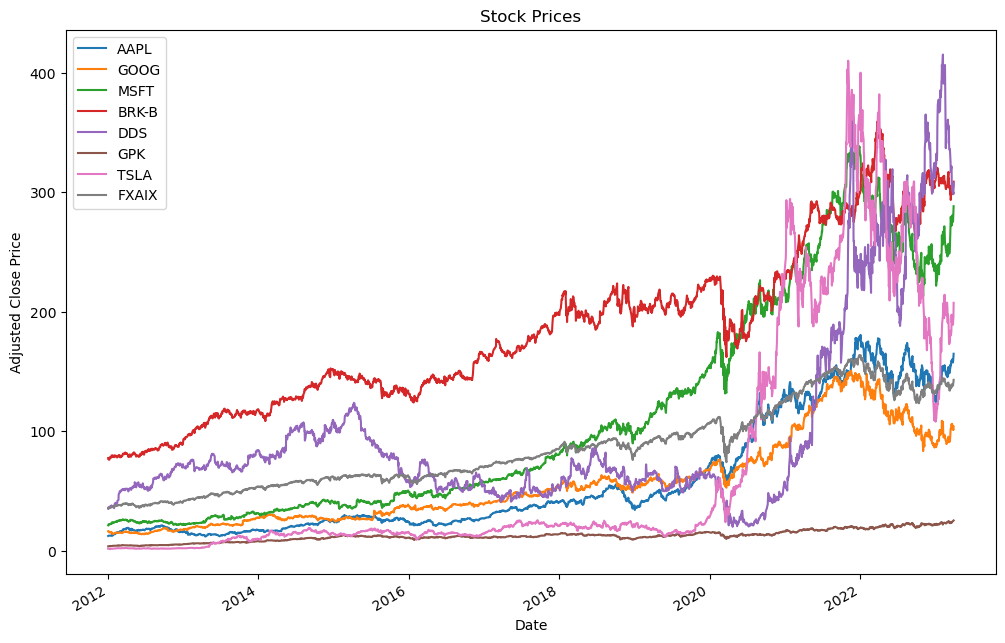

In [3]:
import matplotlib.pyplot as plt

df.plot(figsize=(12,8))
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


In [4]:
betas = {}
for stock in stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    market_data = yf.download('^GSPC', start=start_date, end=end_date)

    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()

    betas[stock] = results.params['Adj Close']

beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

print(beta_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

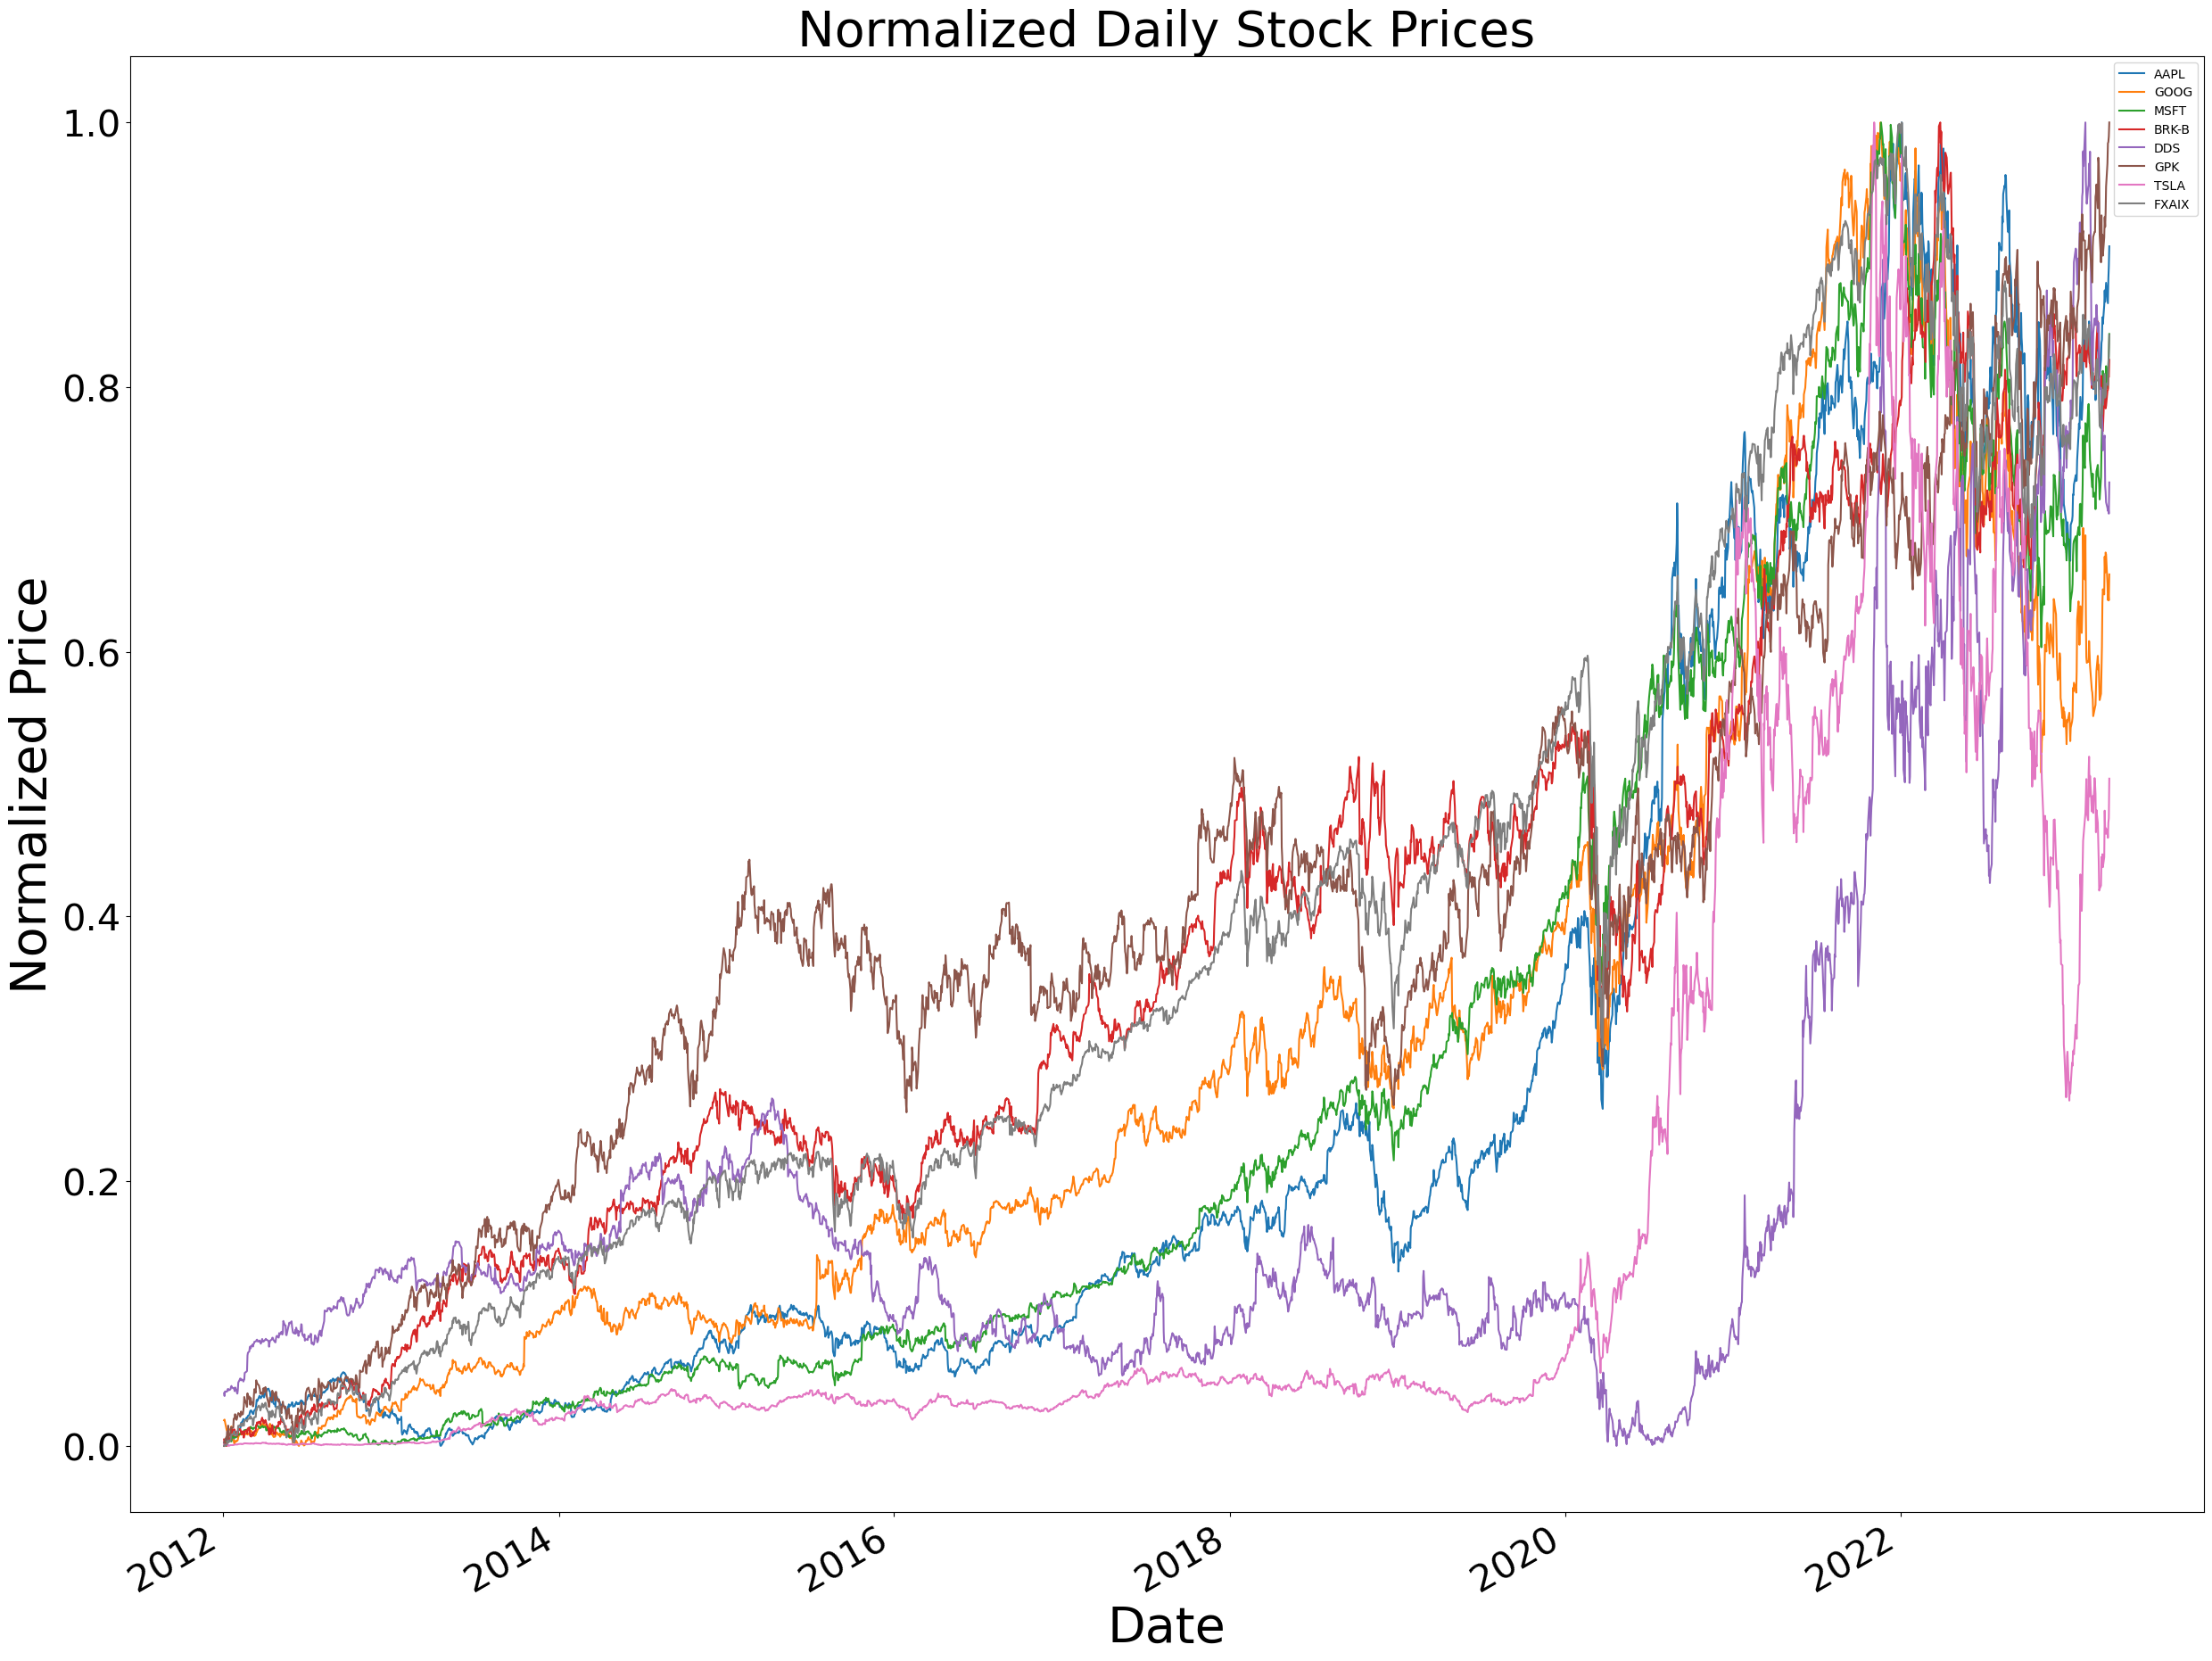

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns, index=df.index)

fig, ax = plt.subplots(figsize = (30, 24))
normalized_df.plot.line(ax=ax, legend=True)
ax.set_title("Normalized Daily Stock Prices")

ax.set_xlabel('Date', fontsize=40)
ax.set_ylabel('Normalized Price', fontsize=40)
ax.set_title('Normalized Daily Stock Prices', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

